# Spatial Data Practice

## Part 1

### Bounding boxes

1. Use google maps or another mapping application to get the approximate bounds of Venezuela.  Express the bounds as `minx`, `miny`, `maxx`, `maxy`.

2. Using the points `minx`, `miny`, `maxx`, `maxy` write coordinates of the form longitude, latitude for each of the corners of a bounding box:

* Upper left corner: 
* Upper right corner:
* Lower left corner:
* Lower right corner:

### CRS and Map Projections

3a) You open a datafile and the unit of the coordinates is kilometers.  Is the CRS geographic or projected?

3b) You open a datafile and the unit of the coordinates is degrees.  Is the CRS geographic or projected?

4. You open a file and see in the metadata that the EPSG code is 4326.  Find that reference system in on www.epsg.io.  What is the unit of that coordinate system?  What area of the world does that system cover (what are the bounds)?

### UTM Grids

5. What is the EPSG code of the UTM grid zone that covers Los Angeles?

6. List any of the UTM grid zones that intersect Australia.

7. In "regular" degree latitude and longitude coordinate systems the latitude spans from -90 to 90 and longitude spans from -180 to 180.  What is the minimum and maximum values of latitude and longitude in a UTM grid zone?

* minimum latitude - 
* maximum latitude - 
* minimum longitude - 
* maximum longitude - 

8. Where is the UTM grid zone the widest?  Why is that?

9. What are the approximate coordinates of the colored locations on the utm grids?

![UTM Grid](./images/utm_grid_with_points.gif)

* green: 
* red:
* orange: 
* purple:

### `shapely`

10. Create a shapely point object to represent your current location.

11. Create a triangle that is a shapely polygon object.

12. Use the minimum and maximum x/y values of Venezuela from the first question to create a shapely bounding box.  Calculate the area of that box.  What are the units of the output?

13. The following bit of code loads the california geojson into a python dictionary.  Use shapely to convert that json to a shapely object.

In [1]:
import json

In [2]:
with open('../data/california.geojson') as f:
    ca_geom_json = json.load(f)

In [3]:
from shapely.geometry import shape

In [4]:
ca_geom = shape(ca_geom_json['geometry'])

14. First take the difference between the california shapely object from the previous question and the `second_polygon` shape.  Then take the union of those two objects.  Calculate the difference in area between the two results.

In [5]:
from shapely.geometry import box

In [6]:
second_polygon = box(-123, 33, -113, 40)

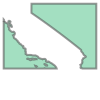

In [7]:
second_polygon - ca_geom

15. Buffer the calfornia shapely object by 0.6 degrees.  Take the difference between the buffered california object and the `second_polygon` polygon.

## Part 2

### Question 1

**A)** There are 60 UTM grid zones that cover the globe.  How many degrees wide is each grid zone?

**B)** California is in UTM zone 10 and Maine reaches UTM zone 19.  How many degrees longitude does the contiguous United States span?

**C)** How wide is a grid zone at the equator?  How wide is it at the poles?  Why is there a difference?

### Question 2

I tell you I have am interested in the UTM grid point with easting value 9500 km and northing value 505 km.  What is wrong?  What is likely my error?

### Question 3

Load the geojson of California with the code below:

In [4]:
import json

In [5]:
with open('../data/california.geojson') as f:
    ca_geom_json = json.load(f)

**A)** Look at the `properties` for the geojson.  What is the population of California?

**B)** Convert the geometry to a shapely object

**C)** What is the center of the state of California?

:::{admonition} Hint
:class: note, dropdown

- Google suggestion: "shapely center of polygon"
- [suggested link](https://deparkes.co.uk/2015/02/28/how-to-find-the-centre-of-a-polygon-in-python/)

:::

**D)** What is the area of California?  What is the unit of the output?

### Question 4

The area in degrees isn't super useful.  It would be much nicer to get the area in square meters or kilometers, but to do that we would need a coordinate system that uses meters or kilometers.  To get there we will need to **project** or convert our crs from our geographic CRS to a projected one.

We define CRSs with a library called `pyproj` like so:

In [11]:
start_proj = 'epsg:4326'

**A)** Define an output projection with a UTM grid that covers the majority of California

**B)** We then define a transformation object.  Notice it gives you a nice description of the applicable bounds.

In [13]:
from pyproj import Transformer

In [14]:
Transformer.from_crs(start_proj, end_proj, always_xy=True)

<Concatenated Operation Transformer: pipeline>
Description: axis order change (2D) + UTM zone 11N
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)

In [15]:
# assign it to a variable
t = Transformer.from_crs(start_proj, end_proj, always_xy=True).transform

Pick a point (in crs epsg:4326) within the area of the UTM grid that you chose.  Create a shapely object out of that point, then convert it to UTM by running:

`transform(TRANSFORMER, SHAPELY_POINT)`

where `TRANSFORMER` is the varible `t` defined in the previous cell and `SHAPELY_POINT` is your point.

What is the value of your coordinates in UTM?

In [22]:
from shapely.ops import transform

In [6]:
# transform(TRANSFORMER, SHAPELY_POINT)

**D)** Use the same syntax as part C to transform the entire california polygon from epsg:4326 to utm coordinates.  Print out the coordinates of the centroid to confirm that the output object is using UTM coordinates.  What is the unit of this coordinate?

**E)** What is the area of California in square km?  Look up the actual area of California is sq km to make sure you are (approximately) correct.